**Importing necessary libraries**

In [1]:
import sklearn 
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from mpl_toolkits import mplot3d

#you can use Python’s imaging library (PIL)
from PIL import Image
from IPython.display import display

# or you can use opencv ## conda install -c conda-forge opencv
import cv2
import scipy.cluster.hierarchy as sch #you only for sch.dendrogram

**Generating Synthetic Data for K-Means CLustering**

In [2]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6,random_state=4)

**Plotting the generated data**

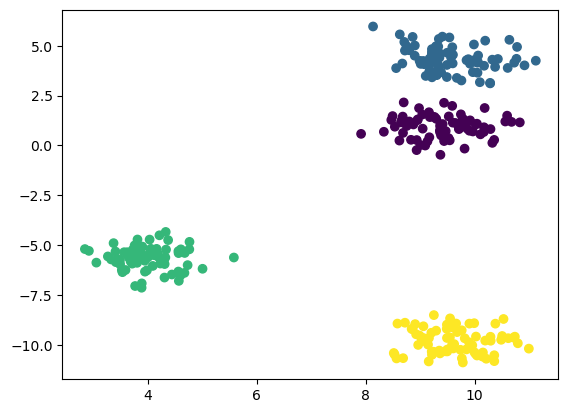

In [3]:
plt.scatter(X[:,0], X[:,1], c=y)

**K-Means CLustering**

In [4]:
def KMeans(data, num_clusters, random_seed=None):
    # Initialize centroids randomly
    centroids = data[np.random.RandomState(random_seed).choice(len(data), num_clusters, replace=False), :]

    # Assign clusters to points
    clusters = np.zeros(len(data))

    while True:
        # Calculate distances to centroids for each point
        distances = np.array([[np.sqrt(np.sum((point - centroid) ** 2)) for centroid in centroids] for point in data])
        # Assign points to nearest centroid
        clusters = np.argmin(distances, axis=1)

        # Calculate new centroids
        new_centroids = [np.mean(data[clusters == i], axis=0) for i in range(num_clusters)]

        # Check for convergence
        if np.allclose(new_centroids, centroids):
            break

        centroids = new_centroids

    return np.array(centroids), clusters


**K-Means Clustering with default seed**

[[  9.2442574   -9.68044278]
 [  9.47997536   2.64262025]
 [  3.98763431  -5.64641882]
 [ 10.23525301 -10.03036884]]


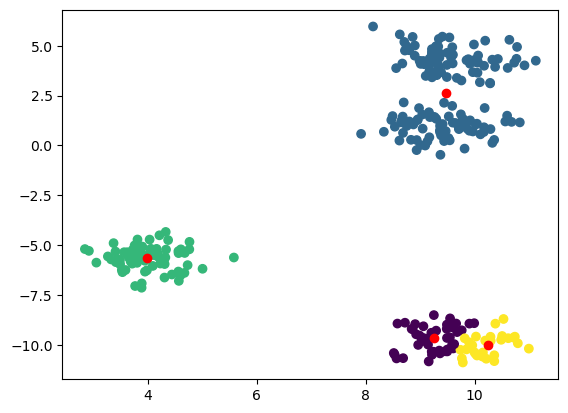

In [5]:
centroids, labels = KMeans(data=X, num_clusters=4)
print(centroids)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.show()


**K-Means Clustering with seed=2**

[[ 9.6142291  -9.81108184]
 [ 3.98763431 -5.64641882]
 [ 9.40771062  0.93935012]
 [ 9.55224009  4.34589038]]


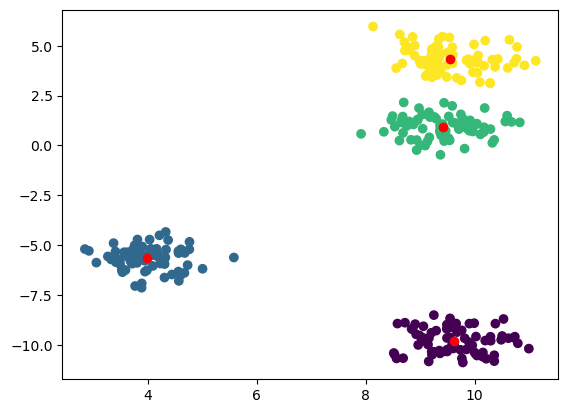

In [6]:
centroids2, labels2 = KMeans(data=X, num_clusters=4, random_seed=2)
print(centroids2)
plt.scatter(X[:,0],X[:,1],c=labels2)
plt.scatter(centroids2[:,0],centroids2[:,1],c='red') 
plt.show()

#### From 4,5, observations we can find that the clusters are different for different seed vlaues which is if seed is 2, then the clusters are more accurate than the default seed. As the default seed depends on initial clusters centroid so it may or may not give best clusters but with seed we have best clusters.

**Function to initialize centroids for clustering**

In [7]:
def initialize_centroids(data, num_clusters, random_seed):
    # Initialize random number generator
    random_generator = np.random.RandomState(random_seed)
    # Select the first centroid randomly
    centroids = [data[random_generator.choice(len(data))]]

    # Select the rest of the centroids
    while len(centroids) < num_clusters:
        # Calculate the distance of each point to its nearest centroid
        distances = np.array([np.min([np.sqrt(np.sum((point - centroid) ** 2)) for centroid in centroids]) for point in data])
        # Calculate the probability of selecting each point as a centroid based on distance
        probabilities = distances ** 2 / np.sum(distances ** 2)
        # Select the next centroid based on the probabilities
        index = np.random.choice(len(data), p=probabilities)
        centroids.append(data[index, :])

    return centroids


**KmeansPlusPlus Clustering**

In [8]:
def KMeansPlusPlus(data, num_clusters, random_seed=None):
    # Initialize centroids using k-means++
    centroids = initialize_centroids(data, num_clusters, random_seed)
    # Assign clusters to points
    clusters = np.zeros(len(data))

    while True:
        # Calculate distances to centroids for each point
        distances = np.array([[np.sqrt(np.sum((point - centroid) ** 2)) for centroid in centroids] for point in data])
        # Assign points to nearest centroid
        clusters = np.argmin(distances, axis=1)
        # Calculate new centroids
        new_centroids = [np.mean(data[clusters == i], axis=0) for i in range(num_clusters)]

        # Check for convergence
        if np.allclose(new_centroids, centroids):
            break

        centroids = new_centroids

    return np.array(centroids), clusters


**K-MeansPlusPlus Clustering with default seed**

[[ 9.40771062  0.93935012]
 [ 9.6142291  -9.81108184]
 [ 9.55224009  4.34589038]
 [ 3.98763431 -5.64641882]]


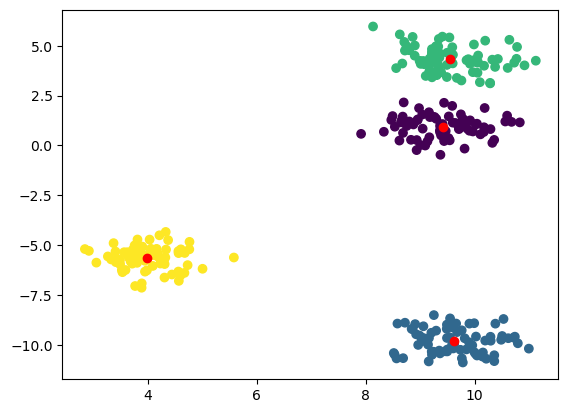

In [9]:
centroids3, labels3 = KMeansPlusPlus(X, num_clusters=4)
print(centroids3)
plt.scatter(X[:,0],X[:,1],c=labels3)
plt.scatter(centroids3[:,0],centroids3[:,1],c='red') 
plt.show()

**K-MeansPlusPlus Clustering with seed=2**

[[ 9.55224009  4.34589038]
 [ 3.98763431 -5.64641882]
 [ 9.6142291  -9.81108184]
 [ 9.40771062  0.93935012]]


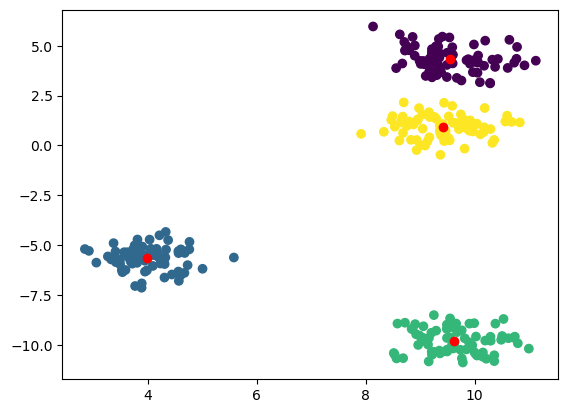

In [10]:
centroids4, labels4 = KMeansPlusPlus(X, num_clusters=4, random_seed=2)
print(centroids4)
plt.scatter(X[:,0],X[:,1],c=labels4)
plt.scatter(centroids4[:,0],centroids4[:,1],c='red') 
plt.show()

#### From 7,8, we see that in K-Means++ there is no effect of seeding and the centroid becomes stabilize faster in K-Means++

**Use an RGB image to cluster the R,G,B data into K clusters to demonstrate image compression**

**Function to plot the image**

In [11]:
def plot_image(original, compressed, title):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original)
    plt.title('Original Image')
    
    plt.subplot(1, 2, 2)
    plt.imshow(compressed)
    plt.title(f'Compressed with {title}')
    plt.show()

**Function to compress the image using KMeans Clustering**

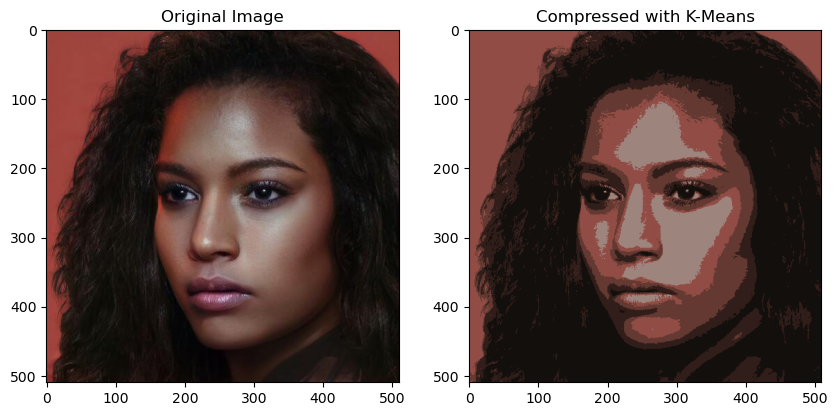

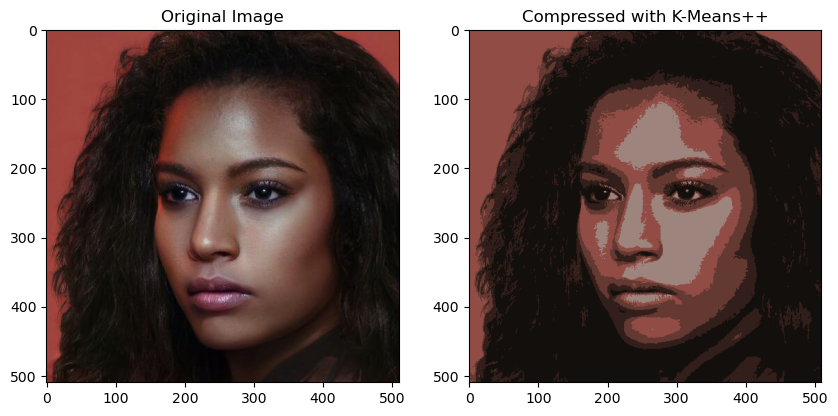

In [12]:
# Function to perform image compression using K-Means and K-Means++ algorithms
def imageCompression(image_path):
    original_image = Image.open(image_path)
    
    # Convert the image to a numpy array and normalize its values
    original_array = np.array(original_image)
    normalized_array = original_array.reshape(-1, 3) / 256.0

    # Perform K-Means clustering on the normalized array
    kmeans_c, kmeans_l = KMeans(data=normalized_array, num_clusters=5)
    
    # Reconstruct the compressed array and convert it back to an image
    compressed_array = kmeans_c[kmeans_l].reshape(original_array.shape) * 256.0
    compressed_image = Image.fromarray(compressed_array.astype('uint8'), mode='RGB')
    
    # Plot the original and compressed images
    plot_image(original_image, compressed_image, "K-Means")

    print("\n")

    # Perform K-Means++ clustering on the normalized array
    kmeans_c2, kmeans_l2 = KMeansPlusPlus(data=normalized_array, num_clusters=5)
    
    # Reconstruct the compressed array and convert it back to an image
    compressed_array2 = kmeans_c2[kmeans_l2].reshape(original_array.shape) * 256.0
    compressed_image2 = Image.fromarray(compressed_array2.astype('uint8'), mode='RGB')
    
    # Plot the original and compressed images
    plot_image(original_image, compressed_image2, "K-Means++")

    return

imageCompression('cropped.jpg')


**In K-means, initial centroids are randomly chosen from the data points, which can lead to poor initializations and suboptimal solutions, as shown in the graph. Running the algorithm multiple times can help avoid suboptimal solutions.** 

**However, K-means++ improves this by choosing initial centroids to ensure greater separation between them. While the first centroid is still chosen randomly, K-means++ ensures that the initial centroids are more evenly spaced and better distributed across the dataset, leading to more accurate clustering results.**

**In our observation, both graphs with different seeds converged to the same optimal solution in K-means++.**

**Heirarchial Clustering**

In [13]:
df = pd.read_csv('Mall_Customers.csv')

In [14]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [15]:
# Convert Gender column to numeric values
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [16]:
# Function to calculate the Ward distance between two clusters
def ward_distance(cluster1, cluster2):
    # Calculate the centroids of each cluster
    centroid1 = np.mean(cluster1, axis=0)
    centroid2 = np.mean(cluster2, axis=0)
    
    # Combine the clusters into a single cluster
    combined_cluster = np.vstack((cluster1, cluster2))
    
    # Calculate the centroid of the combined cluster
    combined_centroid = np.mean(combined_cluster, axis=0)
    
    # Calculate the Ward distance
    ward_dist = np.sum((combined_cluster - combined_centroid)**2) - \
                np.sum((cluster1 - centroid1)**2) - \
                np.sum((cluster2 - centroid2)**2)
    
    return ward_dist

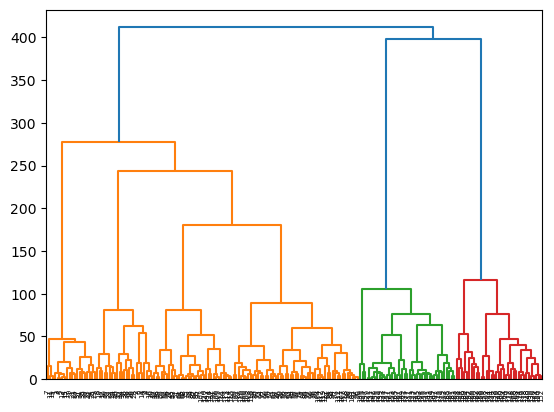

In [24]:
# Function to perform hierarchical clustering
def hierarchical_clustering(data):
    # Initialize clusters as individual data points
    clusters = [[i] for i in range(len(data))]
    
    # Continue merging clusters until only one cluster remains
    while len(clusters) > 1:
        min_dist = float('inf')
        merge_indices = None
        
        # Find the pair of clusters with the minimum Ward distance
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                dist = ward_distance(data[clusters[i]], data[clusters[j]])
                if dist < min_dist:
                    min_dist = dist
                    merge_indices = (i, j)
        
        # Merge the two clusters with the minimum distance
        i, j = merge_indices
        clusters[i] += clusters[j]
        clusters.pop(j)
    
    return clusters[0]

# Perform hierarchical clustering
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values
clusters = hierarchical_clustering(X)

# Plot dendrogram
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))